In [39]:
# effects of L1 and L2 on polynomial regression
# import the necessary modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
# import the dataset which is named "poly_data.csv"
dataset = pd.read_csv('poly_data.csv')

# print the first 5 rows of the dataset
print(dataset.head())

          y         x
0  1.065763  1.047198
1  1.006086  1.117011
2  0.695374  1.186824
3  0.949799  1.256637
4  1.063496  1.326450


In [41]:
# print the shape of the dataset
print(dataset.shape)

(61, 2)


In [42]:
# separate the data into independent (X) and dependent (y) variables (features and response)
predictors = ['x']
response = ['y']

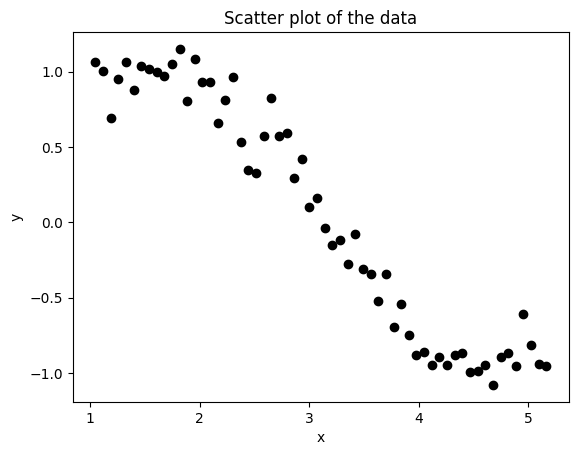

In [43]:
# visualize the data
plt.plot(dataset[predictors], dataset[response], 'o', color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of the data')
plt.show()

In [44]:
# print how many missing values are in the dataset
print(dataset.isnull().sum())

y    1
x    1
dtype: int64


In [45]:
# remove the missing values from the dataset
dataset = dataset.dropna()

In [46]:
# we have visualized the data and we can see that the data is not linear, now is the time to fit the model
# fit a linear regression model to the data
from sklearn.linear_model import LinearRegression

# create an object of the LinearRegression class
lin_reg = LinearRegression()
lin_reg.fit(dataset[predictors], dataset[response]) # fit the model to the data
y_pred = lin_reg.predict(dataset[predictors]) # predict the response variable

In [47]:
# evaluate the model with MSE
from sklearn.metrics import mean_squared_error
mse = np.mean((y_pred - dataset[response])**2) # calculate the MSE
print('The MSE of the linear regression model is: ', mse)


The MSE of the linear regression model is:  y    0.054672
dtype: float64


C:\Users\pkmaz\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


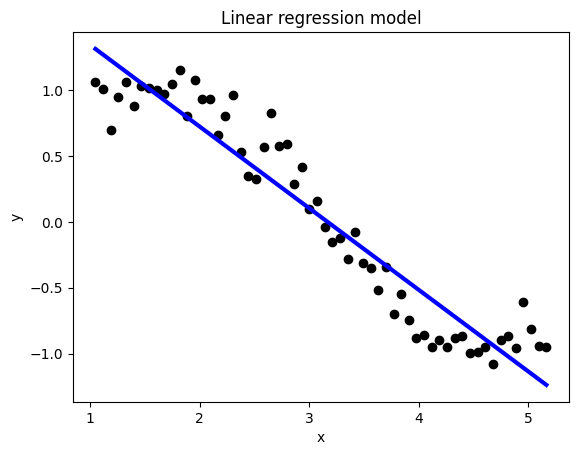

In [48]:
# visualize the linear regression model
plt.plot(dataset[predictors], dataset[response], 'o', color='black')
plt.plot(dataset[predictors], y_pred, color='blue', linewidth=3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear regression model')
plt.show()

In [49]:
print("x_%d"%5)

x_5


In [50]:
# generate column names and columns in our dataframe for the polynomial regression
for i in range(2,6):
    colname = 'x_%d'%i
    dataset[colname] = dataset['x']**i

dataset.head()

,y,x,x_2,x_3,x_4,x_5
0,1.065763,1.047198,1.096623,1.148381,1.202581,1.259340
1,1.006086,1.117011,1.247713,1.393709,1.556788,1.738948
2,0.695374,1.186824,1.408551,1.671702,1.984016,2.354677
3,0.949799,1.256637,1.579137,1.984402,2.493673,3.133642
4,1.063496,1.326450,1.759470,2.333850,3.095735,4.106339


In [51]:
# fit a polynomial regression model to the data
from sklearn.linear_model import LinearRegression

predictors = dataset.columns.values[1:]
lr2 = LinearRegression()
lr2.fit(dataset[predictors], dataset[response]) # fit the model to the data
y_pred2 = lr2.predict(dataset[predictors]) # predict the response variable

In [52]:
# evaluate the model with MSE
from sklearn.metrics import mean_squared_error
mse2 = np.mean((y_pred2 - dataset[response])**2) # calculate the MSE
print('The MSE of the polynomial regression model is: ', mse2)

The MSE of the polynomial regression model is:  y    0.016976
dtype: float64


C:\Users\pkmaz\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


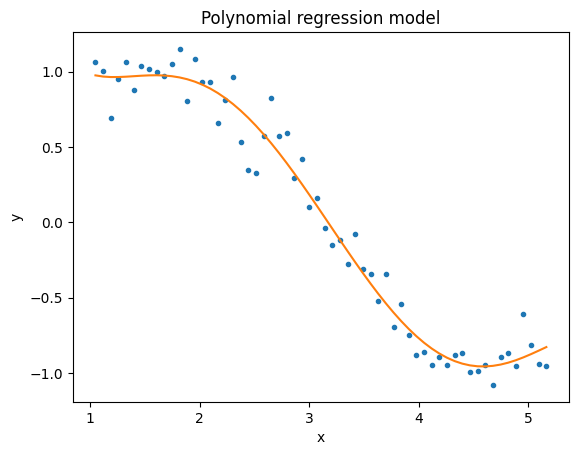

In [53]:
# visualize the polynomial regression model
plt.plot(dataset['x'], dataset['y'], '.', dataset['x'], y_pred2, '-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial regression model')
plt.show()

In [54]:
# print the coefficients of the polynomial regression model
print(lr2.coef_)

[[-5.11776235  4.72461232 -1.92856217  0.33473526 -0.02065326]]


In [55]:
# the MSE of the polynomial regression model is lower than the MSE of the linear regression model which means that the polynomial regression model is a better fit to the data. We can also see this via observation of the difference in plots of the two models.

In [56]:
# generate a model with x^15 features
for i in range(2,16):
    colname = 'x_%d'%i
    dataset[colname] = dataset['x']**i

In [57]:
dataset.head()

,y,x,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1.065763,1.047198,1.096623,1.148381,1.202581,1.259340,1.318778,1.381021,1.446202,1.514459,1.585938,1.660790,1.739176,1.821260,1.907219,1.997235
1,1.006086,1.117011,1.247713,1.393709,1.556788,1.738948,1.942424,2.169708,2.423588,2.707173,3.023942,3.377775,3.773011,4.214494,4.707635,5.258479
2,0.695374,1.186824,1.408551,1.671702,1.984016,2.354677,2.794587,3.316683,3.936319,4.671717,5.544505,6.580351,7.809718,9.268760,11.000386,13.055521
3,0.949799,1.256637,1.579137,1.984402,2.493673,3.133642,3.937850,4.948448,6.218404,7.814277,9.819709,12.339811,15.506664,19.486248,24.487142,30.771450
4,1.063496,1.326450,1.759470,2.333850,3.095735,4.106339,5.446854,7.224981,9.583578,12.712139,16.862020,22.366630,29.668222,39.353420,52.200353,69.241170


In [58]:
# fit a polynomial regression model to the data and then check the fit
predictors = dataset.columns.values[1:]
lr3 = LinearRegression()
lr3.fit(dataset[predictors], dataset[response]) # fit the model to the data
y_pred3 = lr3.predict(dataset[predictors]) # predict the response variable

In [59]:
# evaluate the model with MSE
from sklearn.metrics import mean_squared_error
mse3 = np.mean((y_pred3 - dataset[response])**2) # calculate the MSE
print('The MSE of the polynomial regression model is: ', mse3)


The MSE of the polynomial regression model is:  y    0.014355
dtype: float64


C:\Users\pkmaz\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


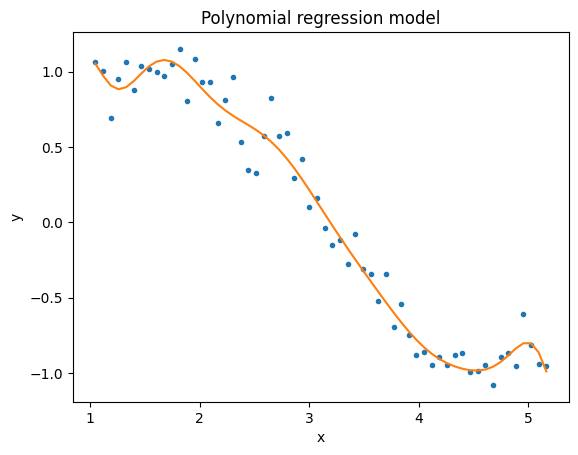

In [60]:
# visualize the polynomial regression model
plt.plot(dataset['x'], dataset['y'], '.', dataset['x'], y_pred3, '-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial regression model')
plt.show()

In [61]:
# print the coefficients of the polynomial regression model
print(lr3.coef_)

[[ 9.73631546e+02 -1.10259931e+03 -4.82712803e+01  1.01430307e+03
  -4.54615200e+02 -7.09004575e+02  1.12915621e+03 -7.95845556e+02
   3.49509726e+02 -1.03970195e+02  2.14211687e+01 -3.02511424e+00
   2.80270308e-01 -1.53750638e-02  3.79007734e-04]]


In [62]:
# print the mse of all the models in a table
print('The MSE of the linear regression model is: ', mse)
print('The MSE of the polynomial regression model is: ', mse2)
print('The MSE of the polynomial regression model with x^15 features is: ', mse3)

The MSE of the linear regression model is:  y    0.054672
dtype: float64
The MSE of the polynomial regression model is:  y    0.016976
dtype: float64
The MSE of the polynomial regression model with x^15 features is:  y    0.014355
dtype: float64


In [63]:
# MSE decreases with increasing the degree of the polynomial and the complexity
# Size of the coefficients increases with increasing the degree of the polynomial and the complexity

In [64]:
# use ridge regression to fit a polynomial regression model to the data and then check the fit
from sklearn.linear_model import Ridge
# call the Ridge function with penalty (lambda) = 0.003
ridgelr = Ridge(alpha=0.003)

In [65]:
# fit the model to the data
ridgelr.fit(dataset[predictors], dataset[response])

Ridge(alpha=0.003)

In [66]:
# predict the response variable
y_pred_ridge = ridgelr.predict(dataset[predictors])

In [67]:
# evaluate the model with MSE
from sklearn.metrics import mean_squared_error
mse_ridge = np.mean((y_pred_ridge - dataset[response])**2) # calculate the MSE
print('The MSE of the polynomial regression model is: ', mse_ridge)

The MSE of the polynomial regression model is:  y    0.015294
dtype: float64


C:\Users\pkmaz\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


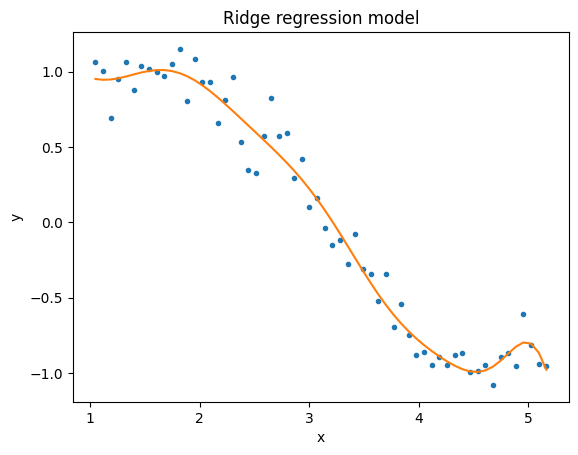

In [68]:
# visualize the polynomial regression model
plt.plot(dataset['x'], dataset['y'], '.', dataset['x'], y_pred_ridge, '-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ridge regression model')
plt.show()

In [69]:
# print the coefficients of the polynomial regression model
print(ridgelr.coef_)

[[-7.29615725e-01 -6.51818482e-01 -4.56228427e-02  5.10518062e-01
   4.63709706e-01 -1.47768730e-01 -4.92364056e-01  5.11982788e-02
   4.38154610e-01 -3.74484681e-01  1.50498338e-01 -3.48641026e-02
   4.78179127e-03 -3.62365821e-04  1.17337827e-05]]


In [70]:
# use lasso regression to fit a polynomial regression model to the data and then check the fit
from sklearn.linear_model import Lasso
# call the Lasso function with penalty (lambda) = 0.01 and specify the iteration limit as 10 to the power of 5
lassolr = Lasso(alpha=0.01, max_iter=100000)


In [71]:
# fit the model to the data
lassolr.fit(dataset[predictors], dataset[response])

C:\Users\pkmaz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.997e-01, tolerance: 3.695e-03
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01, max_iter=100000)

In [72]:
# predict the response variable
y_pred_lasso = lassolr.predict(dataset[predictors])

In [74]:
# evaluate the model with MSE
from sklearn.metrics import mean_squared_error
#Evaluate our model with mean square error
mse5 = np.mean((y_pred_lasso - dataset['y'])**2)
print('The MSE of the polynomial regression model is: ', mse5)

The MSE of the polynomial regression model is:  0.01648998116847555


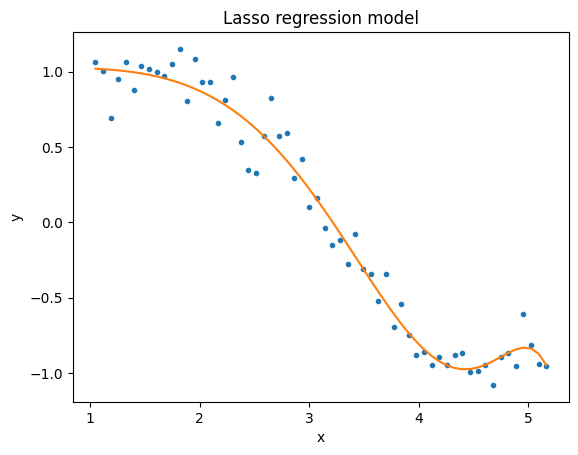

In [75]:
# visualize the polynomial regression model
plt.plot(dataset['x'], dataset['y'], '.', dataset['x'], y_pred_lasso, '-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lasso regression model')
plt.show()